In [4]:
import pandas as pd
import numpy as np
import os
import random
from datetime import datetime, timedelta
from  scipy.stats import pearsonr
import numpy as np
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator

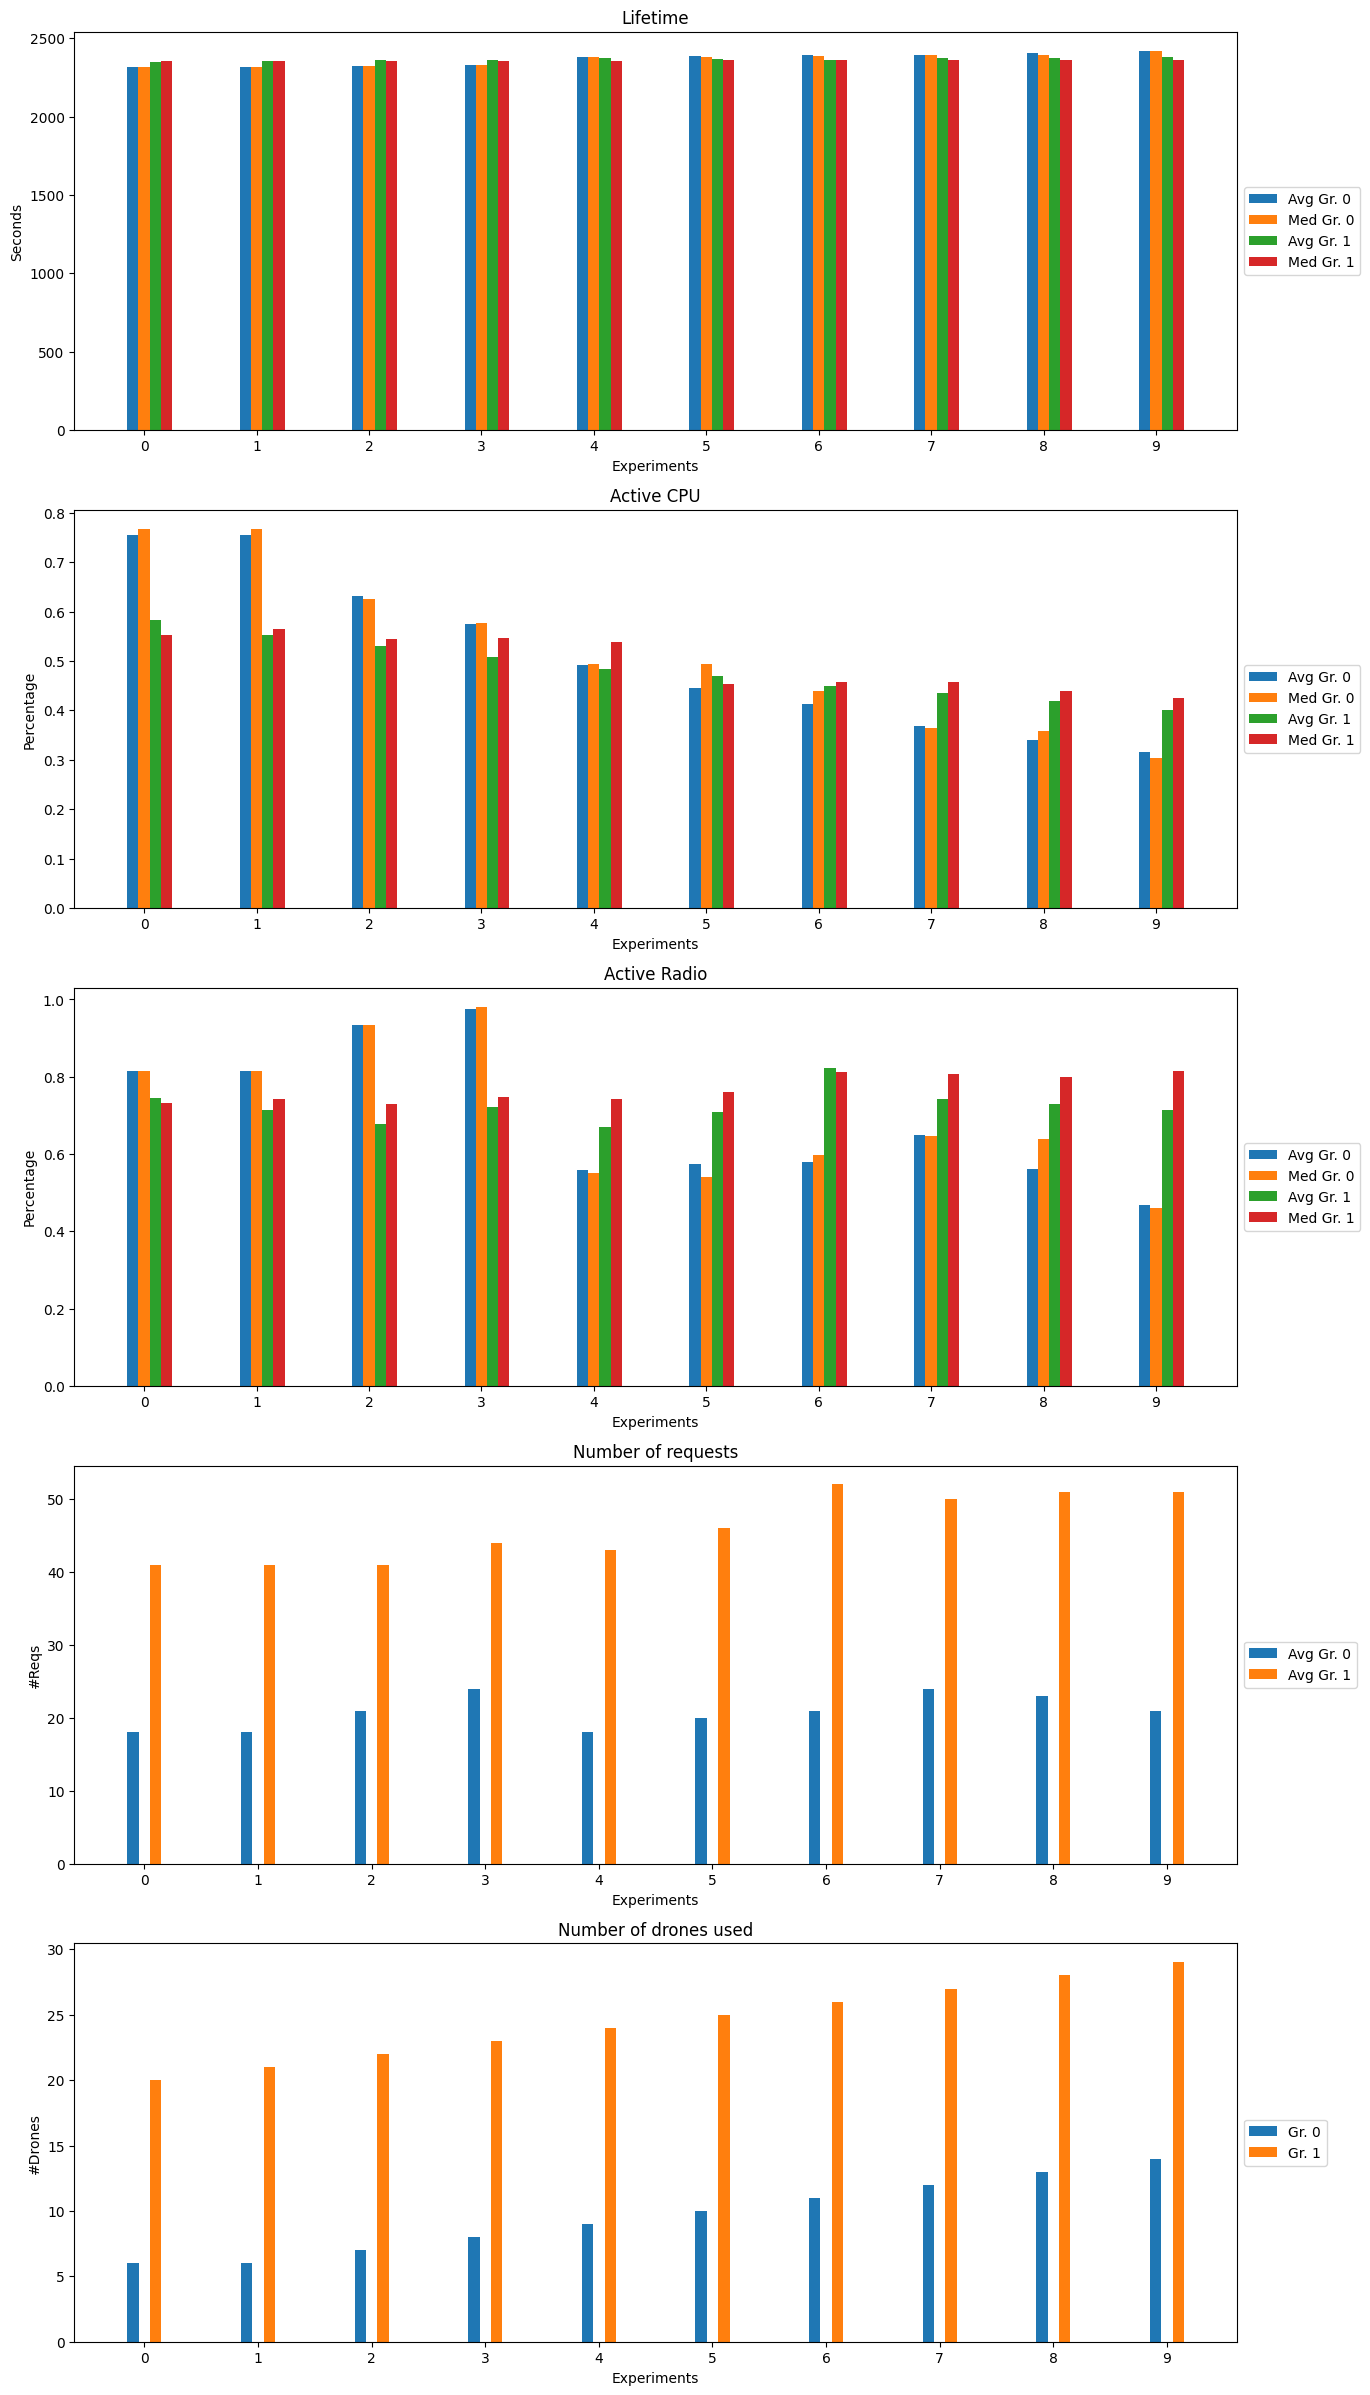

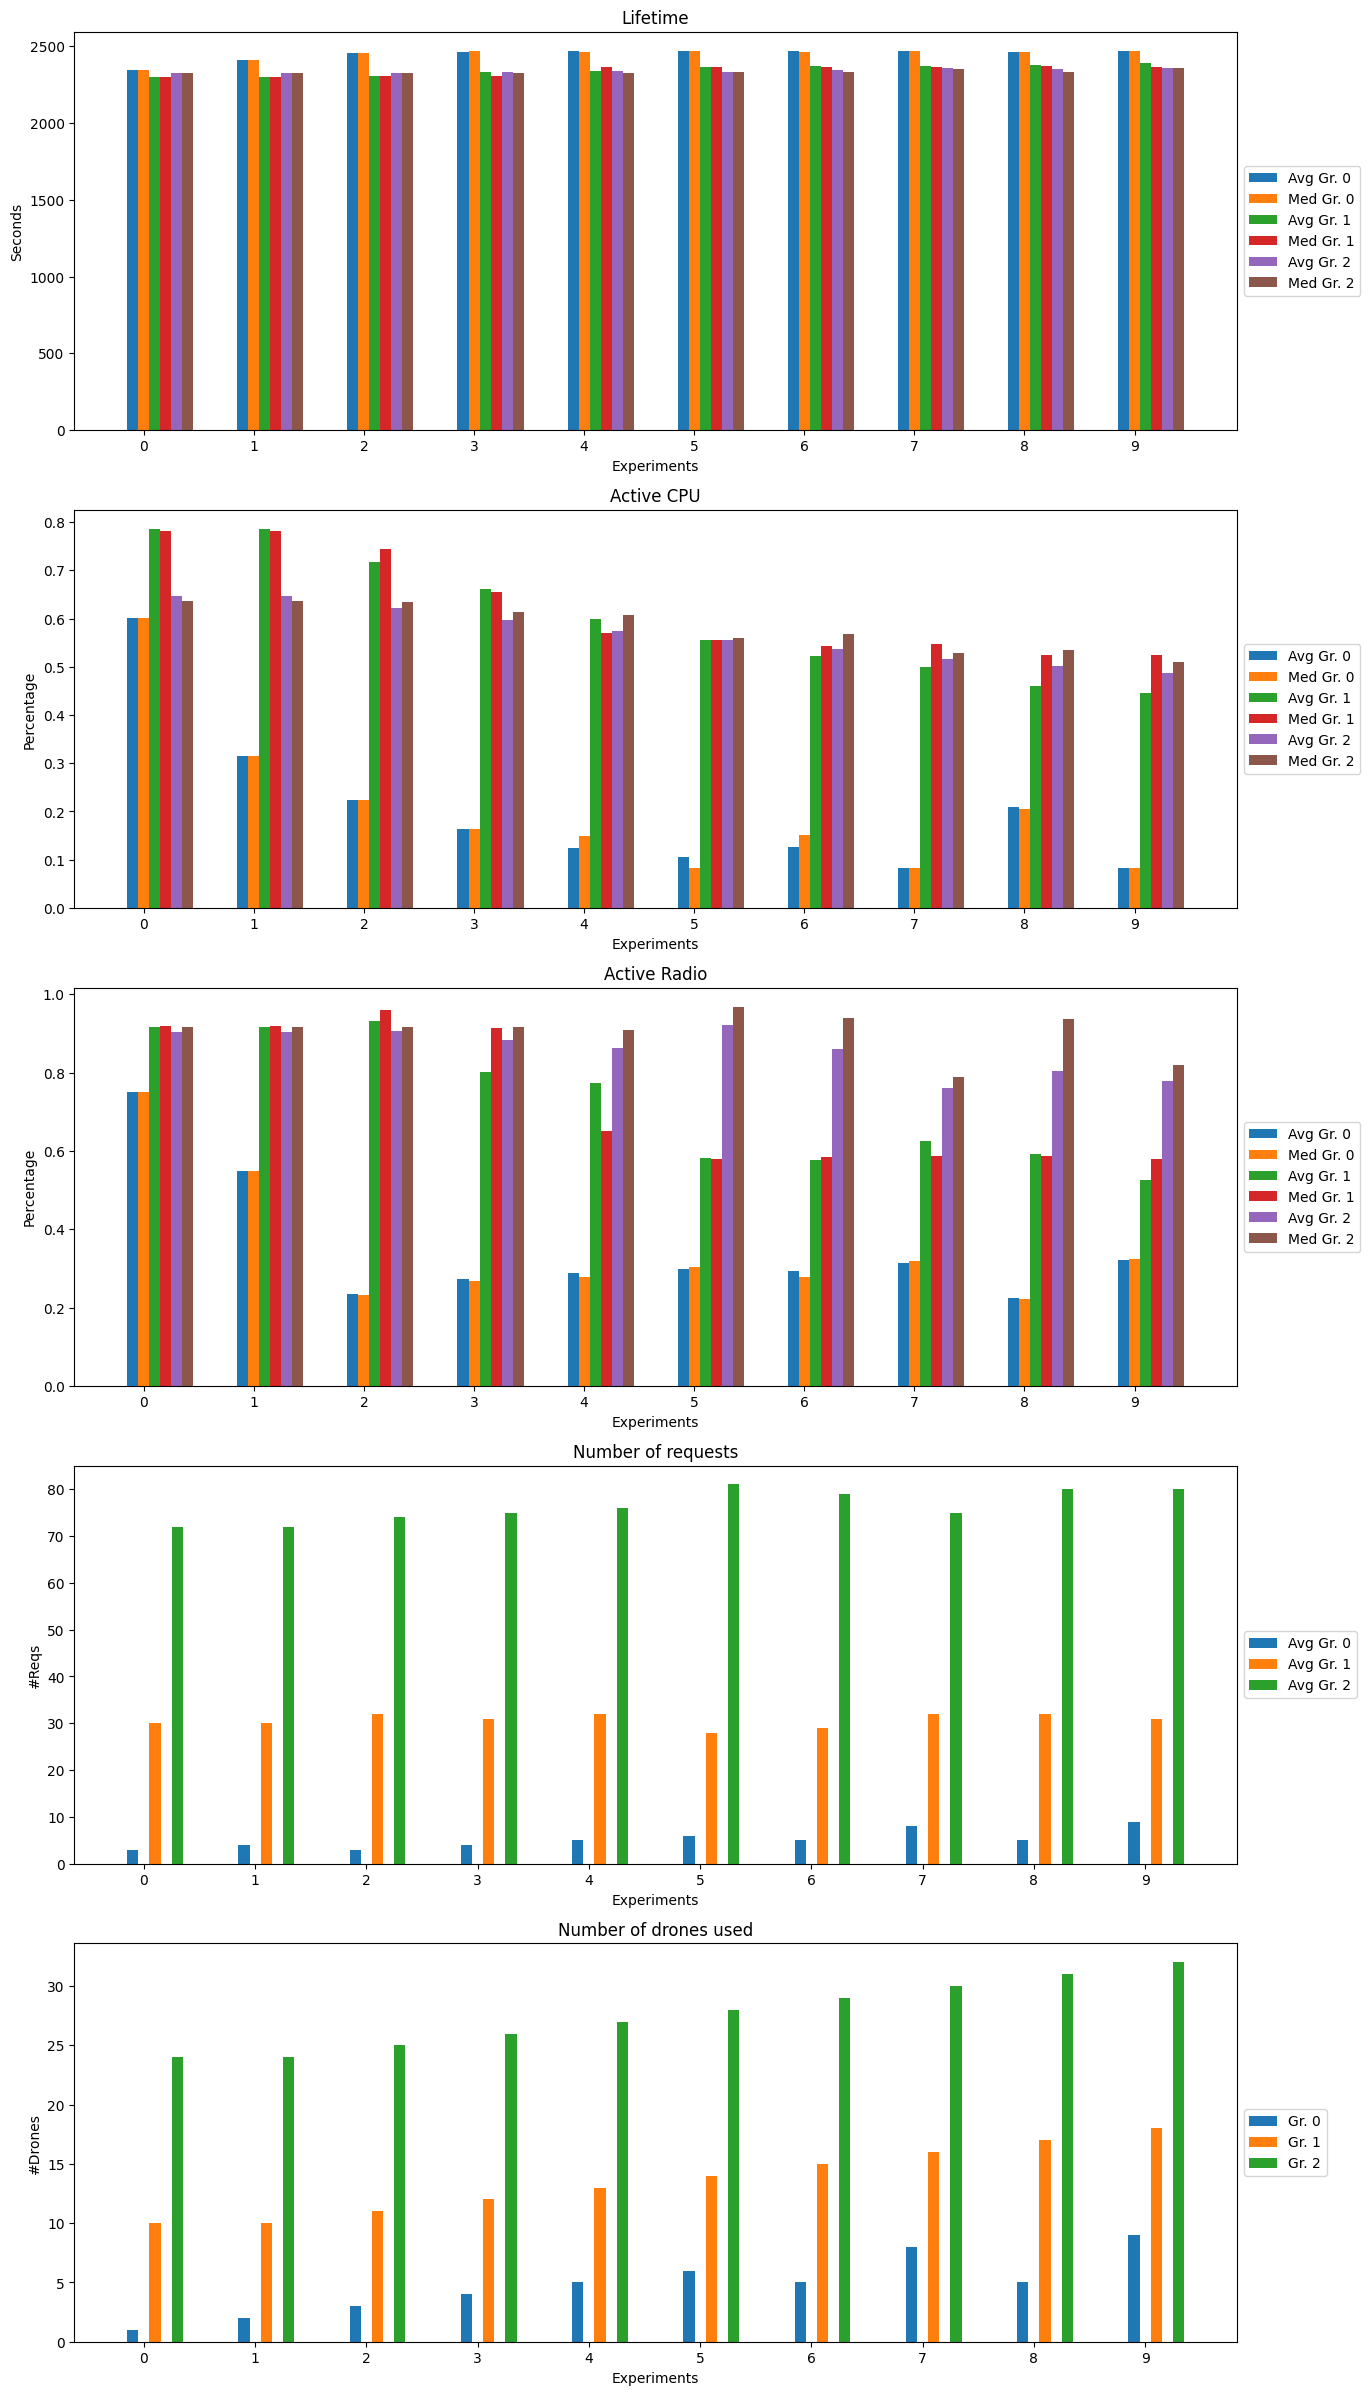

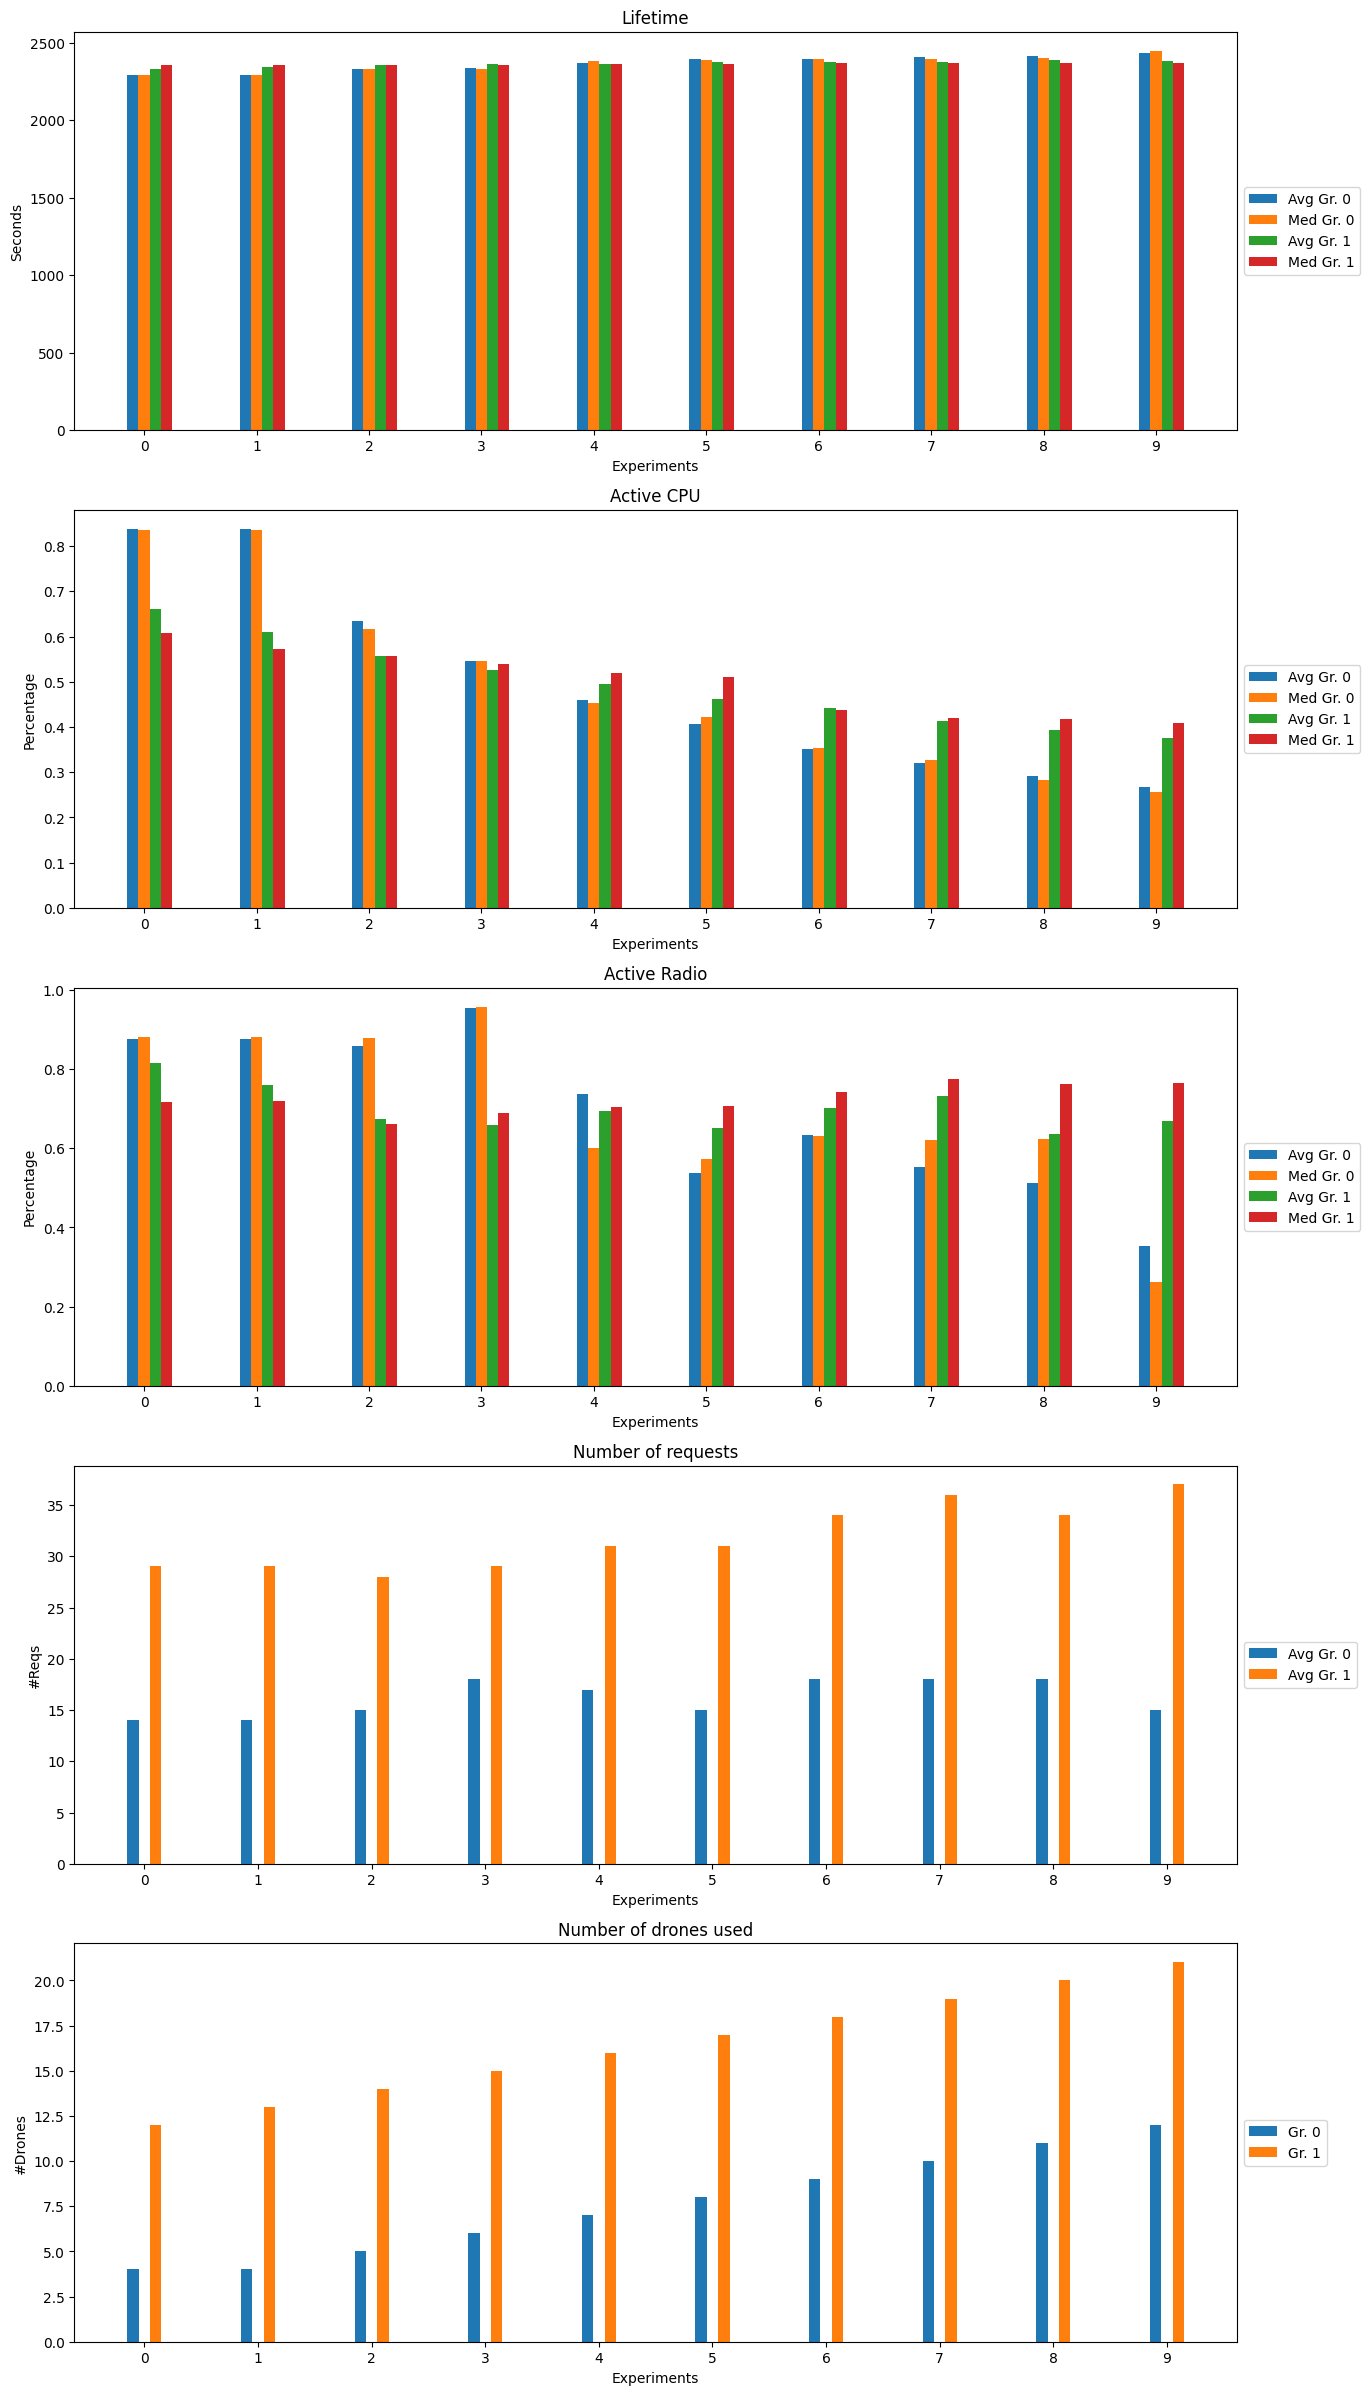

In [7]:

import re
def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(data, key=alphanum_key)

for x in os.listdir("../raw_data/"):
    if "png" in x:
        os.remove("../raw_data/"+x)


exp=1
for folder in os.listdir("../raw_data/"):
    l_d_t=[]
    l_d_vnf=[]
    l_d_req=[]
    type_req=[]
    
    tot_box_plot=[]
    
    i=0
    for file in os.listdir("../raw_data/"+folder):
            if file.endswith('.png'):   os.remove("../raw_data/"+folder+"/"+file) 
            else: pass
    l_d_avg=[]
    l_d_med=[]
    l_p_a_avg=[]
    l_r_a_avg=[]
    all_type_req_avg=[]
    l_p_a_med=[]
    l_r_a_med=[]
    all_type_req_med=[]
    num_drones_used=[]
    for sol in os.listdir("../raw_data/"+folder):
        
        list_files = os.listdir("../raw_data/"+folder+"/"+sol)
        l_d=[]
        l_boxplot = []
        added=False
        l_p_a=[]
        l_r_a=[]
        vnf=[]
        reqs=[]
        for file in sorted(list_files,key=lambda x: int(os.path.splitext(x)[0])):
            tmp=[]
            tmp_p=[]
            tmp_r=[]
            tmp_vnf=[]
            tmp_req=[]
            tmp_type_reqs=[]

            with open("../raw_data/"+folder+"/"+sol+"/"+file) as f:
                
                lines = f.readlines()
                found=False
                for line in lines:
                    line=line.replace("\n","")
                    if("------------" in line):
                        found=True
                    if not found:
                        l=line.strip('][').split(', ')
                        tmp_type_reqs.append([eval(i) for i in l])
                    if found:
                        if("\\end" in line):
                            break
                        if("\\hline" in line):
                            try:
                                tmp.append(float(line.split("&")[1]))
                                tmp_p.append(float(line.split("&")[2]))
                                tmp_r.append(float(line.split("&")[3]))
                                tmp_vnf.append(float(line.split("&")[4]))
                                tmp_req.append(float(line.split("&")[5]))
                            except:
                                pass
            type_req.append([sum(i) for i in zip(*tmp_type_reqs)])
            l_d.append(tmp)
            l_p_a.append(tmp_p)
            l_r_a.append(tmp_r)
            vnf.append(tmp_vnf)
            reqs.append(tmp_req)
    
    
        max_drone=10
        tmp=[np.sum(l)/len(l) for l in reversed(l_d)][:max_drone]
        l_d_avg.append(tmp)
        tmp = [np.median(l) for l in reversed(l_d)][:max_drone]
        l_d_med.append(tmp)

        l_p_a_avg.append([np.sum(p)/len(p) for p in reversed(l_p_a)][:max_drone])
        l_p_a_med.append([np.median(l) for l in reversed(l_p_a)][:max_drone])

        l_r_a_avg.append([np.sum(p)/len(p) for p in reversed(l_r_a)][:max_drone])
        l_r_a_med.append([np.median(l) for l in reversed(l_r_a)][:max_drone])

        all_type_req_avg.append([r[0]+r[1]+r[2] for r in reversed(type_req)][:max_drone])
        num_drones_used.append([len(r) for r in reversed(l_r_a)][:max_drone])


        """
        print("Average Active Processor Group "+str(i)+": "+str(pearsonr(list(reversed([np.sum(p)/len(p) for p in l_p_a]))[:max_drone],tmp_drone_used)[0]))
        print("Median Active Processor Group "+str(i)+": "+str(pearsonr(list(reversed([np.median(p) for p in l_p_a]))[:max_drone],tmp_drone_used)[0]))
        print("Average Active Radio Group "+str(i)+": "+str(pearsonr(list(reversed([np.sum(r)/len(r) for r in l_r_a]))[:max_drone],tmp_drone_used)[0]))
        print("Median Active Radio Group "+str(i)+": "+str(pearsonr(list(reversed([np.median(r) for r in l_r_a]))[:max_drone],tmp_drone_used)[0]))
        print("Drone used Group "+str(i)+": "+str(pearsonr(list(reversed([len(r) for r in l_r_a]))[:max_drone],tmp_drone_used)[0]))

        """

       
        """print("Total Reqs Group "+str(i)+": "+str(pearsonr(list(reversed([r[0]+r[1]+r[2] for r in type_req]))[:max_drone],tmp_drone_used)[0]))
        print("Request of type low of Group "+str(i)+": "+str(pearsonr(list(reversed([r[0] for r in type_req]))[:max_drone],tmp_drone_used)[0]))
        print("Request of type medium of Group "+str(i)+": "+str(pearsonr(list(reversed([r[1] for r in type_req]))[:max_drone],tmp_drone_used)[0]))
        print("Request of type high of Group "+str(i)+": "+str(pearsonr(list(reversed([r[2] for r in type_req]))[:max_drone],tmp_drone_used)[0]))"""
    experiments = np.arange(0, 10)

    # Set the width of each bar
   

    # Create a figure and axis object
    fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1, figsize=(15,30))

    # Set the position of the bars for each group
    bar_width = -0.1
    for i in range(len(l_d_avg)):
        ax1.bar(experiments + bar_width, l_d_avg[i], width=0.1, label='Avg Gr. '+str(i))
        ax2.bar(experiments + bar_width, l_p_a_avg[i], width=0.1, label='Avg Gr. '+str(i))
        ax3.bar(experiments + bar_width, l_r_a_avg[i], width=0.1, label='Avg Gr. '+str(i))
        ax4.bar(experiments + bar_width, all_type_req_avg[i], width=0.1, label='Avg Gr. '+str(i))
        ax5.bar(experiments + bar_width, num_drones_used[i], width=0.1, label='Gr. '+str(i))
        bar_width+=0.1
        ax1.bar(experiments + bar_width, l_d_med[i], width=0.1, label='Med Gr. '+str(i))
        ax2.bar(experiments + bar_width, l_p_a_med[i], width=0.1, label='Med Gr. '+str(i))
        ax3.bar(experiments + bar_width, l_r_a_med[i], width=0.1, label='Med Gr. '+str(i))
        bar_width+=0.1
   

    # Set the labels and title
    ax1.set_xlabel('Experiments')
    ax1.set_ylabel('Seconds')
    ax1.set_title('Lifetime')

    # Set the x-axis tick labels
    ax1.set_xticks(experiments)
    ax1.set_xticklabels(experiments)

    # Display the legend
   

    ax2.set_xlabel('Experiments')
    ax2.set_ylabel('Percentage')
    ax2.set_title('Active CPU')

    # Set the x-axis tick labels
    ax2.set_xticks(experiments)
    ax2.set_xticklabels(experiments)

    
    ax3.set_xlabel('Experiments')
    ax3.set_ylabel('Percentage')
    ax3.set_title('Active Radio')

    # Set the x-axis tick labels
    ax3.set_xticks(experiments)
    ax3.set_xticklabels(experiments)


    
    ax4.set_xlabel('Experiments')
    ax4.set_ylabel('#Reqs')
    ax4.set_title('Number of requests')

    # Set the x-axis tick labels
    ax4.set_xticks(experiments)
    ax4.set_xticklabels(experiments)

    ax5.set_xlabel('Experiments')
    ax5.set_ylabel('#Drones')
    ax5.set_title('Number of drones used')

    # Set the x-axis tick labels
    ax5.set_xticks(experiments)
    ax5.set_xticklabels(experiments)


    # Display the legend
    ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax5.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    fig.savefig("../raw_data/"+folder+"/"+folder+".png")
    # Show the plot
    plt.show()

      